Créer un modèle monocouche pour la fonction OU et AND

In [1]:
def perceptron_or(x):
    net=x[1]+x[0]-1
    if net<0 :
        return 0
    else:
        return 1
def perceptron_and(x):
    net=x[1]+x[0]-2
    if net<0 :
        return 0
    else:
        return 1


Créer un modèle avec une couche cachée pour la fonction XOR

In [2]:
def perceptron_xor(x):
    net1=x[0]+x[1]
    if net1<1 :
        a1= 0
    else:
        a1=1
    net2=-x[0]-x[1]
    if net2<-1 :
        a2= 0
    else:
        a2=1
    if a1+a2<2:
        return 0
    else:
        return 1

In [3]:
#tester la fonction 
x=(1,1)
perceptron_xor(x)

0

Optimiser le modèle par l'algorithme rétropropagation(backpropagation)
par modifier les poids et le biais

In [4]:
def propagation(x,b,a,ws):
#appliquer la fonction de propagation
    h=ws[0]*x[0]+ws[1]*x[1]+b
    if h>0:
        h=1
    else:
        h=0
    if perceptron_or(x)==h:
        return 1
    else:
        w=tuple(a*(perceptron_or(x)-h)* i for i in x)
        ws=tuple(map(sum,zip(ws,w)))
        b=b+a*(perceptron_or(x)-h)
        return (ws,b)
    

In [5]:
#Tester
x=(0,0)
ws=(-0.5,0.5)
propagation(x,1,0.1,ws)

((-0.5, 0.5), 0.9)

In [6]:
liste=[(0,0),(0,1),(1,0),(1,1)]

In [7]:
#tester sur une liste de données
ws=(-0.5,0.5)
a=0.1
b=1
pr=propagation(x,b,a,ws)
for i in liste:
    print(propagation(i,b,a,ws))
    if propagation(i,b,a,ws) !=1:
        ws=propagation(i,b,a,ws)[0]
        b=propagation(i,b,a,ws)[1]
    
        
        

((-0.5, 0.5), 0.9)
1
1
1


importer les bibliotèques nécessaires

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

charger les données

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
print(len(x_train),len(x_test))

60000 10000


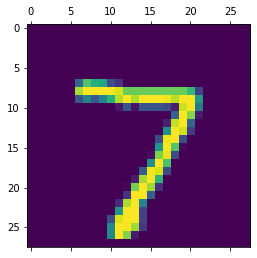

In [11]:
plt.matshow(x_test[0])

In [12]:
y_test[0]

7

rendre les données plats pour l'apprentissage

In [13]:
x_train = x_train / 255
x_test = x_test / 255
# Flattening the train and test data
x_train_plat = x_train.reshape(len(x_train), 28*28)
x_test_plat = x_test.reshape(len(x_test), 28*28)

In [14]:
#creer un model avec une seule couche cachée de 
model1 = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,  activation='softmax')
    
                            ])
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(x_train_plat, y_train, epochs=4)


Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2692 - accuracy: 0.9243
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1191 - accuracy: 0.9650
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9740
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0629 - accuracy: 0.9811


on fait varier les parametres : nombre de couches cachées, nombre des neurons, nombre des epochs(combien de fois on passe sur les données d'apprentissage) et aussi la fonction d'activation dans le but de trouver le meilleur score
avec optimisation par backpropagation

In [15]:

model = keras.Sequential([
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(400, activation='softmax'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(784,  activation='softmax')
    
 #optimiser par backpropagation   
                            ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
#faire l'apprentissage
model.fit(x_train_plat, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8177 - accuracy: 0.6899
Epoch 2/7
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1575 - accuracy: 0.9609
Epoch 3/7
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0996 - accuracy: 0.9740
Epoch 4/7
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0745 - accuracy: 0.9804
Epoch 5/7
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0606 - accuracy: 0.9837
Epoch 6/7
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0518 - accuracy: 0.9859
Epoch 7/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0430 - accuracy: 0.9890


évaluer le modèle

In [17]:
scores=model.evaluate(x_test_plat, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0951 - accuracy: 0.9767


In [76]:
from sklearn.metrics import accuracy_score, precision_score,recall_score

In [23]:
print("%s: %.2f%% \n %s: %.2f%%" % (model.metrics_names[1], scores[1]*100,model.metrics_names[0], scores[0]*100))

accuracy: 97.67% 
 loss: 9.51%


faire les predictions sur 5 données de test

In [24]:
y_predicted = model.predict(x_test_plat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 [==============================] - 2s 7ms/step


[7, 2, 1, 0, 4]

In [53]:
y_test[:5]
#y_predicted_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

On remarque que le modèle a fait une bonne prédiction

On rend le jeux de données biclasse pour extraire la precision et le rappel

In [ ]:
#d'abord pour appliquer la fonction astype il faut rendre la liste en array
arr=np.array(y_predicted_labels)


In [105]:
train_labels = y_train.astype(bool)
test_labels = y_test.astype(bool)
predicted_labels=arr.astype(bool)

In [103]:
    print("Accuracy = {}".format(accuracy_score(test_labels, predicted_labels)))
    print("Precision = {}".format(precision_score(test_labels, predicted_labels)))
    print("Recall = {}".format(recall_score(test_labels, predicted_labels)))  

10000 10000


In [104]:
#preds = predict(model, x_test, threshold)
print_stats(y_test)

Accuracy = 0.9978
Accuracy = 0.9767
Precision = 0.9986699179782753
Recall = 0.9988913525498891


### from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
len(y_predicted_labels)

In [ ]:
preds = predict(model, x_test, threshold)
print_stats(y_predicted_labels, y_test)

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [135]:
import cv2

In [137]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [138]:
f_train=x_train
f_test=x_test


appliquer un filtre median de 5 pour voir l'impact

In [139]:
from skimage.filters import median
for i in range(len(x_test)):
    f_test[i]=cv2.medianBlur(x_test[i],5)
for i in range(len(x_train)):
    f_train[i]=cv2.medianBlur(x_train[i],5)
     


Plater les données

In [140]:
f_train = f_train / 255
f_test = f_test / 255
f_test_plat = f_test.reshape(len(f_test), 28*28)
f_train_plat = f_train.reshape(len(f_train), 28*28)

Utiliser un modèle avec les meme paramètres que le précédent

In [141]:
model_filtre = keras.Sequential([
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(400, activation='softmax'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(10,  activation='softmax')
    
 #optimiser par backpropagation   
                            ])
model_filtre.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [143]:
model_filtre.fit(f_train_plat, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 23s 11ms/step - loss: 1.0162 - accuracy: 0.6071
Epoch 2/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3221 - accuracy: 0.9114
Epoch 3/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2176 - accuracy: 0.9385
Epoch 4/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1759 - accuracy: 0.9496
Epoch 5/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1452 - accuracy: 0.9578
Epoch 6/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1271 - accuracy: 0.9628
Epoch 7/7
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1110 - accuracy: 0.9677


In [144]:
model_filtre.evaluate(f_test_plat, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.1779 - accuracy: 0.9519


[0.17791809141635895, 0.9519000053405762]

In [146]:
model.evaluate(x_test_plat, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.1371 - accuracy: 0.9652


[0.13707886636257172, 0.9652000069618225]

on remarque que le perfermance se diminue en appliquant le filtre 

Faire changer la base de données

In [164]:
(fashion_train, fash_train), (fashion_test, fash_test) = keras.datasets.fashion_mnist.load_data();

In [165]:
fashion_train = fashion_train / 255
fashion_test = fashion_test / 255
# Flattening the train and test data
fash_train_plat = fashion_train.reshape(len(fashion_train), 28*28)
fash_test_plat = fashion_test.reshape(len(fashion_test), 28*28)

Utiliser le modèle utilisé pour MNIST

In [166]:
model_fashion = keras.Sequential([
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(400, activation='softmax'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(10,  activation='softmax')
    
 #optimiser par backpropagation   
                            ])
model_fashion.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [167]:
#faire l'apprentissage
model_fashion.fit(fash_train_plat, fash_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 25s 13ms/step - loss: 1.0550 - accuracy: 0.5767
Epoch 2/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5164 - accuracy: 0.7998
Epoch 3/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4164 - accuracy: 0.8546
Epoch 4/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3682 - accuracy: 0.8719
Epoch 5/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3391 - accuracy: 0.8811
Epoch 6/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3201 - accuracy: 0.8862
Epoch 7/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3076 - accuracy: 0.8906


In [169]:
model_fashion.evaluate(fash_test_plat, fash_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3653 - accuracy: 0.8725


[0.36530739068984985, 0.8725000023841858]